In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import datetime

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

## Load data

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Create houston avocado conventional data

In [5]:
houston_c = df[['Date', 'AveragePrice', 'Total Volume']][(df['type'] == 'conventional') & (df['region'] == 'Houston')]

In [6]:
houston_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 936 to 8705
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.3+ KB


Need to convert Date column data type

In [7]:
houston_c.head(60)

,Date,AveragePrice,Total Volume
936,2015-12-27,0.78,944506.54
937,2015-12-20,0.75,922355.67
938,2015-12-13,0.73,998752.95
939,2015-12-06,0.74,989676.85
940,2015-11-29,0.79,783225.98
941,2015-11-22,0.73,913002.96
942,2015-11-15,0.72,998801.78
943,2015-11-08,0.75,983909.85
944,2015-11-01,0.77,1007805.74
945,2015-10-25,0.88,933623.58


In [8]:
houston_c.tail(20)

,Date,AveragePrice,Total Volume
6615,2017-02-19,0.67,1190708.83
6616,2017-02-12,0.58,1420811.06
6617,2017-02-05,0.55,1977923.65
6618,2017-01-29,0.70,1258481.11
6619,2017-01-22,0.68,1119168.10
6620,2017-01-15,0.53,1613159.67
6621,2017-01-08,0.57,1417208.02
6622,2017-01-01,0.51,1475741.07
8694,2018-03-25,0.56,2120511.03
8695,2018-03-18,0.79,1243926.96


In [9]:
#Set the date column into it right data type
houston_c['Date'] = pd.to_datetime(houston_c['Date'])

In [10]:
houston_c.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
dtype: object

In [11]:
#Sort the Date column ascending
houston_c.sort_values(by=['Date'], inplace=True, ascending=True)

In [12]:
houston_c.set_index('Date', drop = True, inplace = True)

In [13]:
houston_c['Revenue'] = houston_c['AveragePrice'] * houston_c['Total Volume']

In [14]:
houston_c.head()

,AveragePrice,Total Volume,Revenue
Date,,,
2015-01-04,0.71,1062990.62,754723.3402
2015-01-11,0.78,1062071.65,828415.8870
2015-01-18,0.77,1017854.16,783747.7032
2015-01-25,0.77,983910.94,757611.4238
2015-02-01,0.72,1280364.01,921862.0872


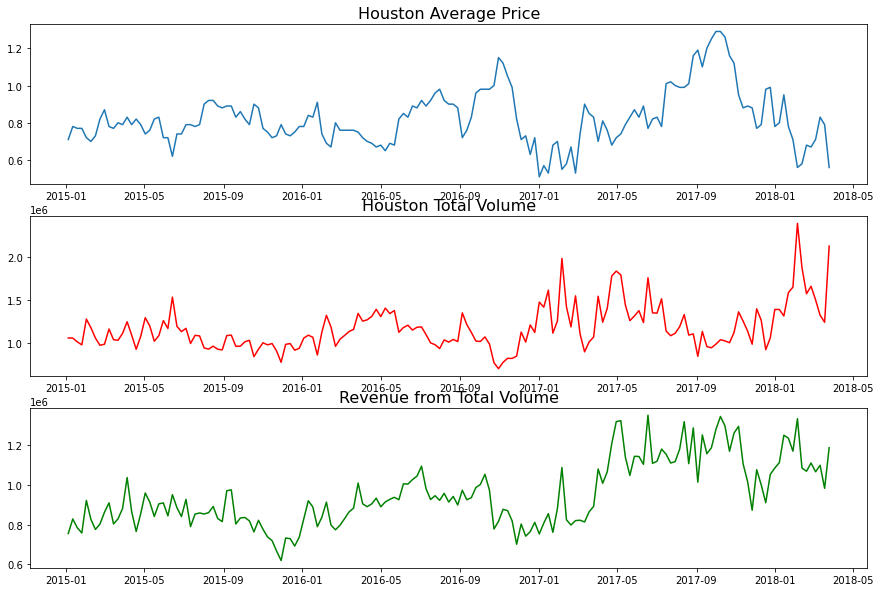

In [15]:
plt.figure(figsize = (15, 10))

plt.subplot(3,1,1)
plt.plot(houston_c['AveragePrice'])
plt.title('Houston Average Price', size = 16)

plt.subplot(3,1,2)
plt.plot(houston_c['Total Volume'], color = 'r')
plt.title('Houston Total Volume', size = 16)


plt.subplot(3,1,3)
plt.plot(houston_c['Revenue'], color = 'g')
plt.title('Revenue from Total Volume', size = 16)
plt.savefig("trend4.png")
plt.show()

- There is a seasonal trend from 2015 to 2018:
- The trend of AveragePrice will droped down from Spring until March.

# Seasonal Decompose

In [16]:
def season_decompose(data, feature):
    result = seasonal_decompose(houston_c[feature], model = 'multiplicative', period = 52)
    plt.rcParams['figure.figsize'] = (14, 9)
    result.plot()
    plt.show()

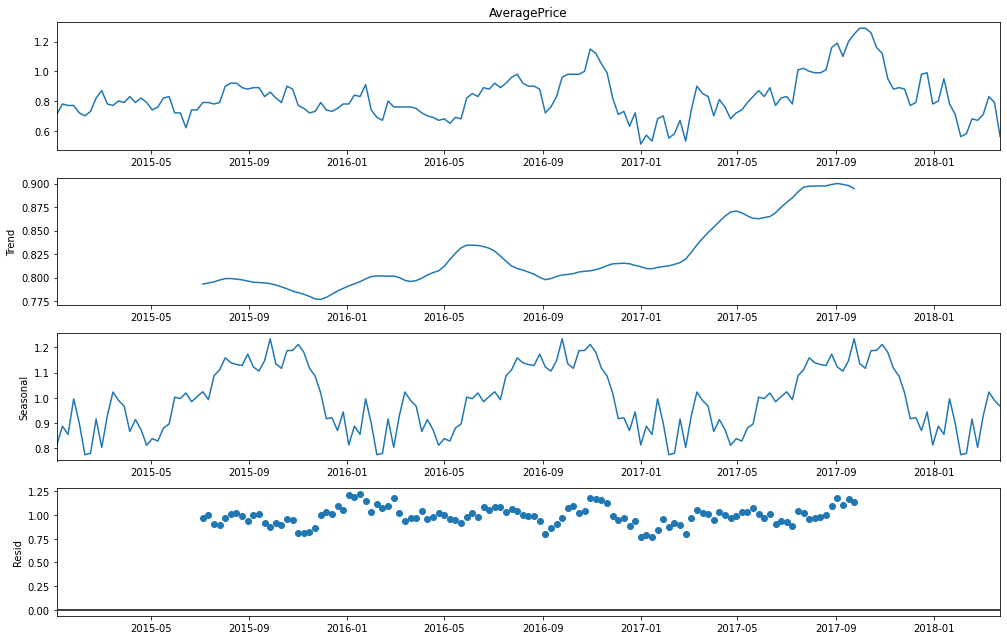

In [17]:
season_decompose(houston_c, 'AveragePrice')

- The Average trend rised up really fast from 2016 to present.
- The spring - summer season are the suitable season for selling conventional avocado when the price droped down, and Volume increased.

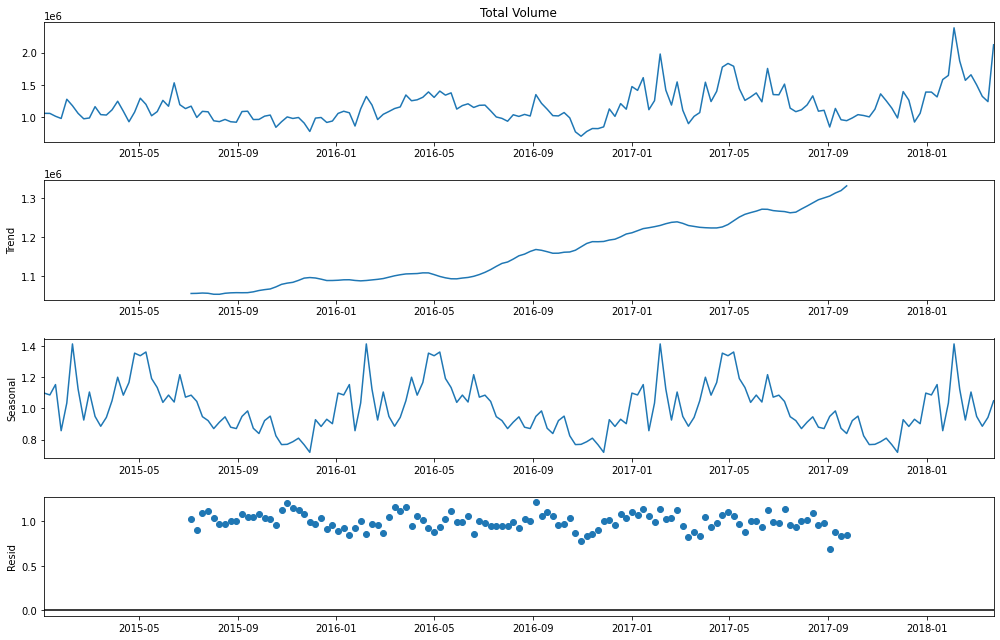

In [18]:
season_decompose(houston_c, 'Total Volume')

- The Total Volume increased alot from 2016 to present.
- There is a seasonal through years.

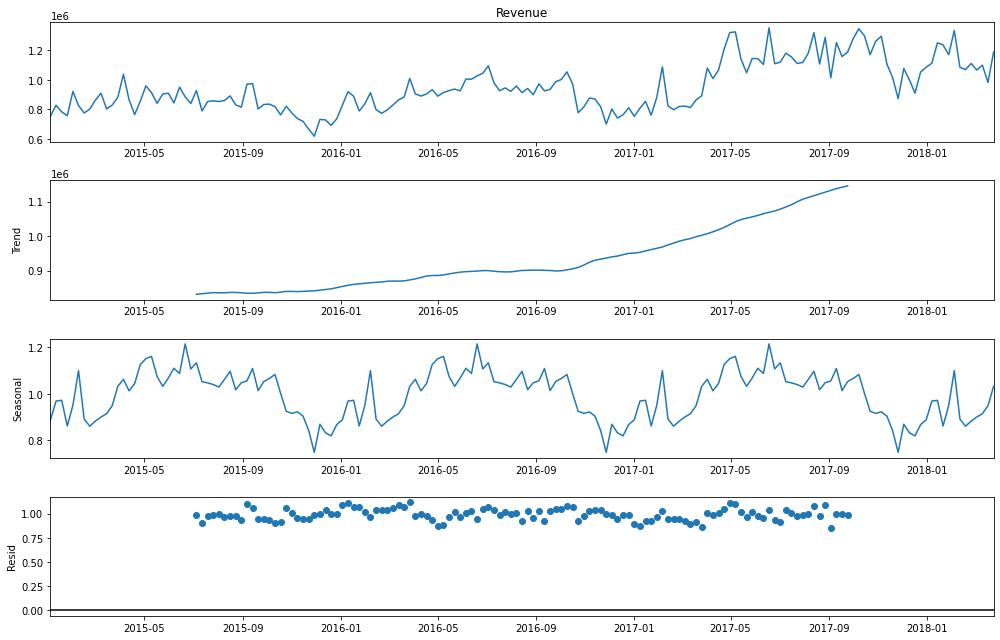

In [19]:
season_decompose(houston_c, 'Revenue')

- As I mentioned, Spring - summer is the suitable moment for making profit, the revenue increased from 2015 to present and it created a multiplication seasonal trend

# Select train/test data

In [16]:
#Select X_train/test

train = houston_c['AveragePrice'].loc['2015-01-04': '2017-12-31']
test = houston_c['AveragePrice'].loc['2018-01-07':]

print('Train size:', len(train), '\t\t\t Test size:', len(test))
print('Test size percentage:', round(len(test)/houston_c.shape[0], 2))

Train size: 157 			 Test size: 12
Test size percentage: 0.07


- train data: 157 weeks (3year | 2015 - 12/2017)
- test data: 12 weeks (the first 3 months of 2018)

# Auto Arima

In [21]:
stepwise_model = auto_arima(houston_c['AveragePrice'], start_p=2, start_q=2,
                           m = 52,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print('AIC of the best model: ',stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[52]             : AIC=inf, Time=73.79 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=-197.004, Time=0.92 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=-203.825, Time=11.64 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=-205.550, Time=15.31 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=-195.283, Time=0.80 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=25.77 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=inf, Time=63.41 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=-204.023, Time=9.97 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=inf, Time=57.47 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=-206.274, Time=9.01 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=26.82 sec
 ARIMA(0,1,0)(0,1,2)[52]             : AIC=inf, Time=38.10 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=-204.607, Time=14.46 sec
 ARIMA(0,1,0)(1,1,2)[52]             : AIC=inf, Time=38.26 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=-

In [22]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)

In [17]:
import pmdarima as pm
arima = pm.ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)
arima.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)

In [22]:
import pickle
with open('pmdarima4.pkl', 'wb') as pkl:
    pickle.dump(arima, pkl)

In [18]:
arima_forecast = arima.predict(n_periods=len(test))   #n_periods: khoang thoi gian can du bao

In [19]:
arima_forecast = pd.DataFrame(arima_forecast, index = test.index, columns = ['Prediction'])

[]

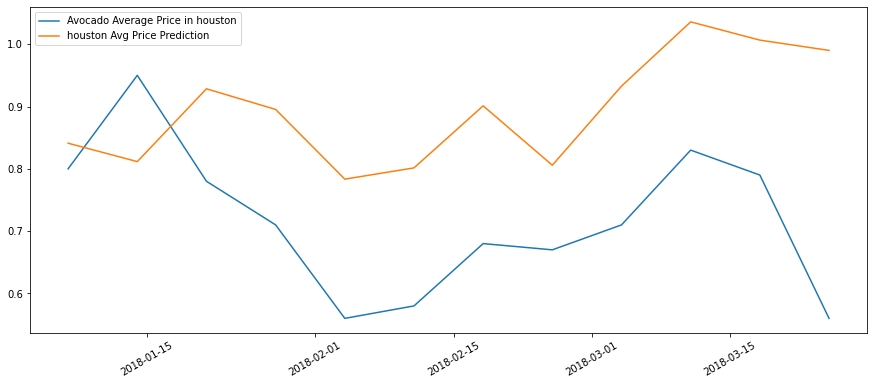

In [20]:
plt.figure(figsize = (15, 6))
plt.subplot(1,1,1)
plt.plot(test, label = 'Avocado Average Price in houston')
plt.plot(arima_forecast, label = 'houston Avg Price Prediction')
plt.xticks(rotation = 30)
plt.legend(loc = 'best')
plt.plot()

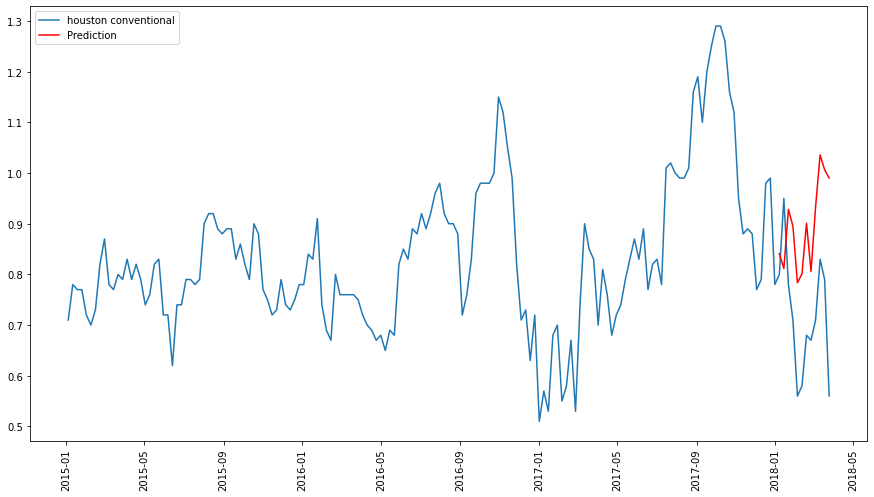

In [21]:
plt.figure(figsize = (15,8))
plt.plot(houston_c['AveragePrice'], label = 'houston conventional')
plt.plot(arima_forecast, label = 'Prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

- The prediction of the first 3 months of 2018 seem difference when there is a huge magin/great fluctuations.
- The mae quite big (0.16), I will try with fpprophet.

In [22]:
mae = mean_absolute_error(test, arima_forecast[0:len(test)])
mae

0.19916872057668092

In [23]:
test.mean()

0.7183333333333334

### Predict for the next 40 weeks (2018)

In [24]:
arima_forecast_40 = arima.predict(n_periods=len(test) + 40)

[]

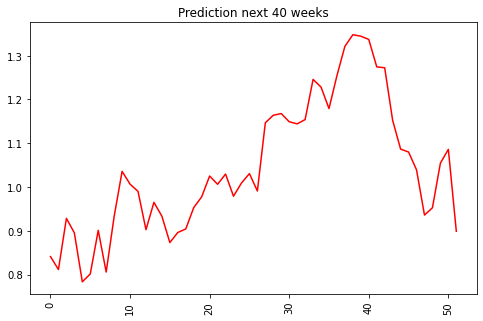

In [25]:
plt.figure(figsize = (8,5))
plt.plot(arima_forecast_40, color = 'red')
plt.xticks(rotation = 'vertical')
plt.title('Prediction next 40 weeks')
plt.plot()

##### Create dataframe for the next 40 week of 2018

In [26]:
#create dât for the next 40 weeks of 2018
weekdays = pd.date_range('2018-04-01', '2018-12-31', freq = 'W').strftime("%Y-%m-%d").tolist()

In [27]:
arima_forecast_40 = pd.DataFrame({'DATE': weekdays,
                                   'houston_c_prediction':arima_forecast_40[len(test):]})

In [28]:
arima_forecast_40['DATE'] = pd.to_datetime(arima_forecast_40['DATE'])

In [29]:
arima_forecast_40.set_index('DATE', drop = True, inplace = True)

In [30]:
arima_forecast_40.head()

,houston_c_prediction
DATE,
2018-04-01,0.902556
2018-04-08,0.965040
2018-04-15,0.933368
2018-04-22,0.873192
2018-04-29,0.896159


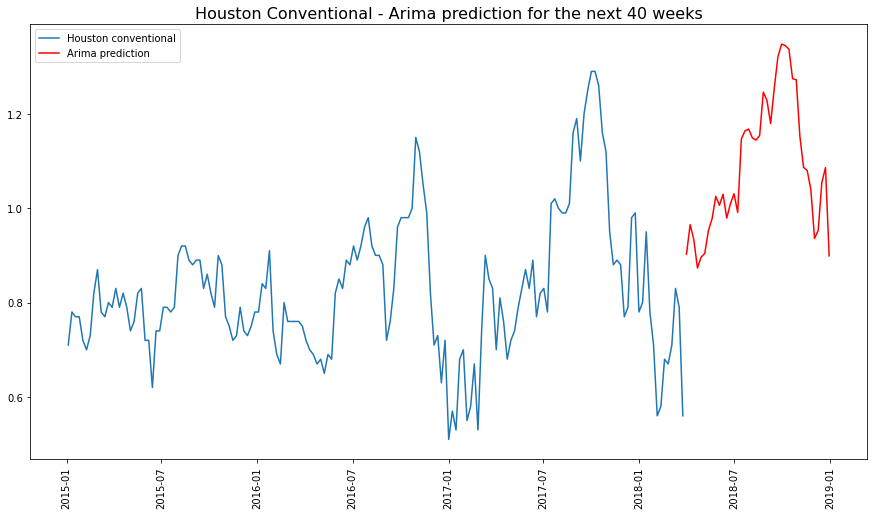

In [31]:
plt.figure(figsize = (15,8))
plt.plot(houston_c['AveragePrice'], label = 'Houston conventional')
plt.plot(arima_forecast_40['houston_c_prediction'], label = 'Arima prediction', color = 'red')
plt.xticks(rotation = 'vertical')
plt.title('Houston Conventional - Arima prediction for the next 40 weeks', size = 16)
plt.legend()
plt.savefig("arima4.png")
plt.show()

- In the next 40 weeks, there is a good result showed that Houston will be one of the new market of the organization:
    - The seasonal trend will be continued, but this year (2018) will be harder than past year. Specifically, the price as Arima model gave higher than last year, but it still accepable.
    - The price will be high, but not high than the big market like california, and this year price have decreased lower than last year so the profit will be increased. 

# Holtwinter

In [32]:
holtwinter_model = ExponentialSmoothing(train, seasonal = 'mul',
                             seasonal_periods = 52).fit()
holtwinter_pred = holtwinter_model.predict(start = test.index[0], end = test.index[-1])

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


In [70]:
with open('holtwinter4.pkl', 'wb') as pkl:
    pickle.dump(holtwinter_model, pkl)

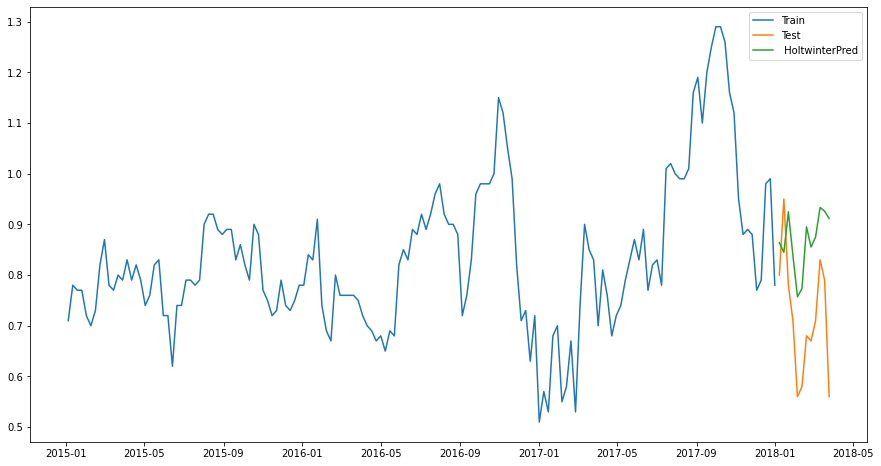

In [33]:
plt.figure(figsize = (15,8))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(holtwinter_pred.index, holtwinter_pred, label = ' HoltwinterPred')
plt.legend(loc = 'best')

In [34]:
mae = mean_absolute_error(test, holtwinter_pred[0:len(test)])
mae

0.16572365345652992

##### Create next 40 weeks dataframe for Holtwinter prediction

In [35]:
e = datetime.datetime(2018,12,31)
holtwinter_forecast_40 = holtwinter_model.predict(start = test.index[-1], end = e)
holtwinter_forecast_40 = holtwinter_forecast_40
holtwinter_forecast_40 = pd.Series(holtwinter_forecast_40)

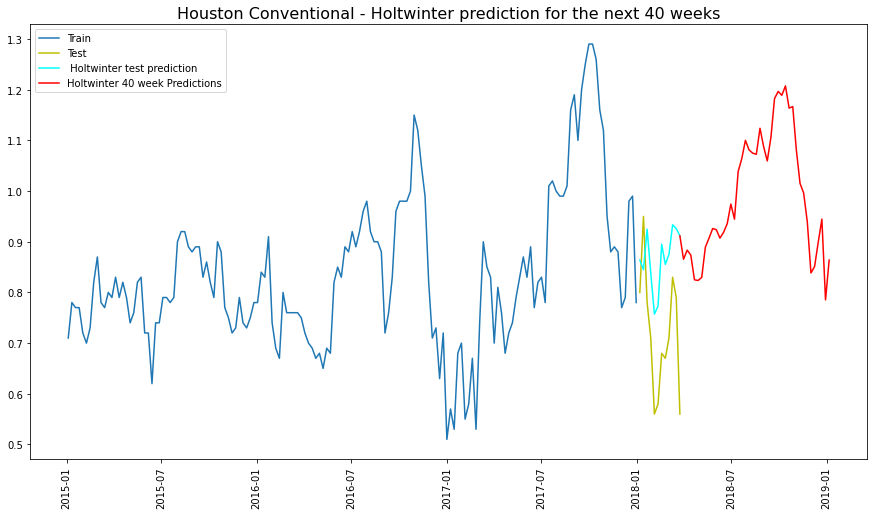

In [36]:
plt.figure(figsize = (15,8))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test', color = 'y')
plt.plot(holtwinter_pred.index, holtwinter_pred, label = ' Holtwinter test prediction', color = 'cyan')
plt.plot(holtwinter_forecast_40, label = 'Holtwinter 40 week Predictions', color = 'red')
plt.xticks(rotation = 'vertical')
plt.title("Houston Conventional - Holtwinter prediction for the next 40 weeks", size = 16)
plt.legend()
plt.savefig("holtwinter4.png")
plt.show()

##### Holtwinter Result:
- The price of Holtwinter is different than Arima, when the prediction price this year is lower than last year.
- The Holwinter mse is lower than Arima (not much), but give the totaly difference prediction result. The prediction is different than the actual test, when it can not stick with the large margin area. 
- I will make a prediction with fbprophet model for advance.

# fbprophet

In [37]:
prophet_df = houston_c['AveragePrice'].copy()
prophet_df = prophet_df.reset_index()

In [38]:
prophet_df.columns = ['ds', 'y']

In [39]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      169 non-null    datetime64[ns]
 1   y       169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


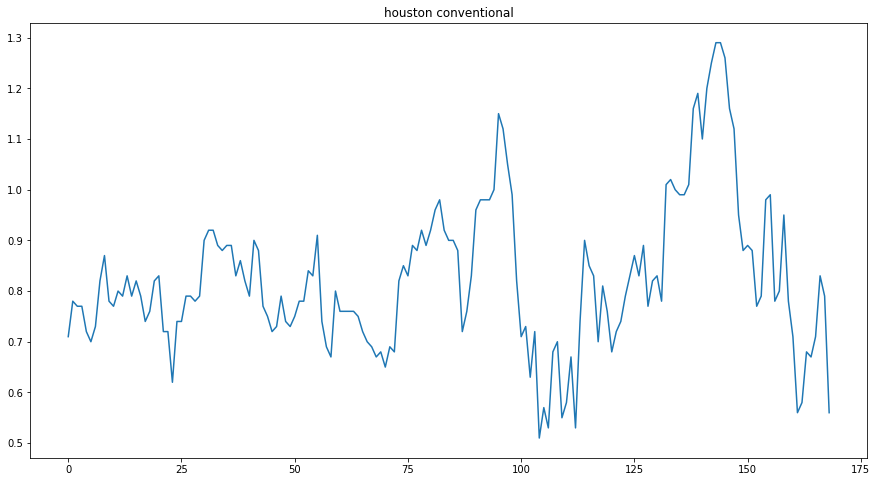

In [40]:
plt.figure(figsize = (15,8))
plt.plot(prophet_df.y)
plt.title('houston conventional')
plt.show()

- Same plot as above

##### Create train/test data for prophet

In [41]:
#train/test split
train = prophet_df.drop(prophet_df.index[-12:])
test = prophet_df.drop(prophet_df.index[0:-12])

In [42]:
train.tail()

,ds,y
152,2017-12-03,0.77
153,2017-12-10,0.79
154,2017-12-17,0.98
155,2017-12-24,0.99
156,2017-12-31,0.78


In [43]:
test

,ds,y
157,2018-01-07,0.80
158,2018-01-14,0.95
159,2018-01-21,0.78
160,2018-01-28,0.71
161,2018-02-04,0.56
162,2018-02-11,0.58
163,2018-02-18,0.68
164,2018-02-25,0.67
165,2018-03-04,0.71
166,2018-03-11,0.83


In [44]:
prophet_model = Prophet(yearly_seasonality = True, daily_seasonality = False, weekly_seasonality = True)

There is a weekly seasonaality through year so I decided setting the parameter of year and week as True

In [45]:
prophet_model.fit(train)

In [46]:
with open('fbprophet4.pkl', 'wb') as pkl:
    pickle.dump(prophet_model, pkl)

NameError: name 'pickle' is not defined

##### Create data prediction for the whole 2018

In [48]:
#create data for 2018
weeks = pd.date_range('2018-01-07', '2018-12-31',
                      freq = 'W').strftime('%Y-%m-%d').tolist()
prophet_future = pd.DataFrame(weeks)
prophet_future.columns = ['ds']
prophet_future['ds'] = pd.to_datetime(prophet_future['ds'])

In [49]:
prophet_forecast = prophet_model.predict(prophet_future)

In [50]:
prophet_forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-07,0.863253
1,2018-01-14,0.892368
2,2018-01-21,0.916664
3,2018-01-28,0.906908
4,2018-02-04,0.868541
5,2018-02-11,0.840791
6,2018-02-18,0.857603
7,2018-02-25,0.912791
8,2018-03-04,0.967298
9,2018-03-11,0.988934


In [51]:
print('Mean of original data', prophet_df.y.mean())
print('Mean of test data',test.y.mean())

Mean of original data 0.8250887573964497
Mean of test data 0.7183333333333334


In [52]:
y_test = test['y'].values
y_pred = prophet_forecast['yhat'].values[:12]
mae_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f'% mae_p)

rmse_p = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' %rmse_p)

MAE: 0.205
RMSE: 0.226


The mae score of prophet model lower than arima and Holtwinter

In [53]:
y_test_value = pd.DataFrame(y_test, index = pd.to_datetime(test['ds']),columns=['Actual'])
y_pred_value = pd.DataFrame(y_pred, index = pd.to_datetime(test['ds']),columns=['Prediction'])

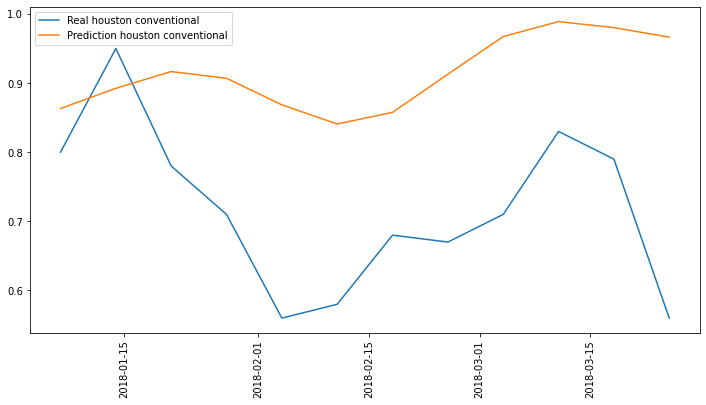

In [54]:
# Visulaize the result
plt.figure(figsize=(12,6))
plt.plot(y_test_value, label='Real houston conventional')
plt.plot(y_pred_value, label='Prediction houston conventional')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_11872/1313328995.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


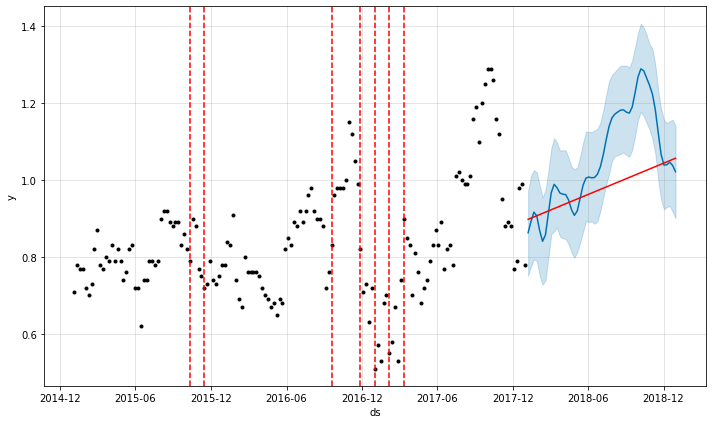

In [55]:
fig = prophet_model.plot(prophet_forecast)
fig.show()
a = add_changepoints_to_plot(fig.gca(), prophet_model, prophet_forecast)

C:\Users\DELL\AppData\Local\Temp/ipykernel_11872/694214153.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


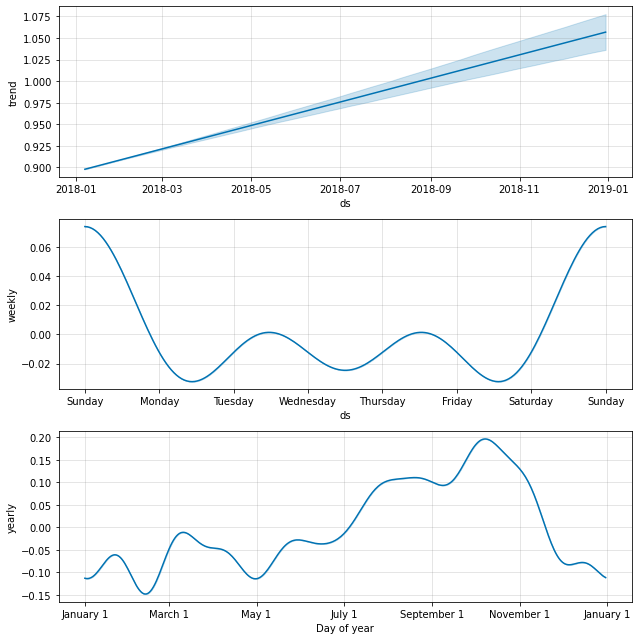

In [56]:
fig1 = prophet_model.plot_components(prophet_forecast)
fig1.show()

- Trend will increased from 2018 to 2019
- Same scenario as Arima model, the trend rised up from summer or fall and droped down really fast at the beginning of winter. This time people does not buy avocados until price low in Jan - May.
- But in this model, we can see activity are really high at the weekend (weekly plot) because customer usually buy stuff for the whole week.

### Long term predict

In [57]:
m = Prophet(yearly_seasonality = True, daily_seasonality = False, weekly_seasonality = False)
m.fit(prophet_df)
prophet_future = m.make_future_dataframe(periods = 54*1, freq = 'W')

In [58]:
prophet_forecast_40 = m.predict(prophet_future)

In [59]:
prophet_forecast_40.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          223 non-null    datetime64[ns]
 1   trend                       223 non-null    float64       
 2   yhat_lower                  223 non-null    float64       
 3   yhat_upper                  223 non-null    float64       
 4   trend_lower                 223 non-null    float64       
 5   trend_upper                 223 non-null    float64       
 6   additive_terms              223 non-null    float64       
 7   additive_terms_lower        223 non-null    float64       
 8   additive_terms_upper        223 non-null    float64       
 9   yearly                      223 non-null    float64       
 10  yearly_lower                223 non-null    float64       
 11  yearly_upper                223 non-null    float64       

In [60]:
prophet_forecast_40[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
211,2019-01-20,0.864259,0.745659,0.991134,0.933921,0.928675,0.940025
212,2019-01-27,0.836377,0.725081,0.958848,0.934829,0.929434,0.941152
213,2019-02-03,0.779657,0.649821,0.906516,0.935736,0.930268,0.942338
214,2019-02-10,0.739731,0.619669,0.861032,0.936644,0.931021,0.943629
215,2019-02-17,0.755064,0.636084,0.882627,0.937551,0.931681,0.944712
216,2019-02-24,0.816686,0.685742,0.938670,0.938459,0.932338,0.945894
217,2019-03-03,0.876638,0.754292,0.996366,0.939366,0.933044,0.947041
218,2019-03-10,0.895978,0.778228,1.020759,0.940274,0.933659,0.948150
219,2019-03-17,0.879761,0.756815,1.006052,0.941181,0.934365,0.949180
220,2019-03-24,0.863114,0.750725,0.995118,0.942089,0.935003,0.950290


C:\Users\DELL\AppData\Local\Temp/ipykernel_11872/3619656754.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


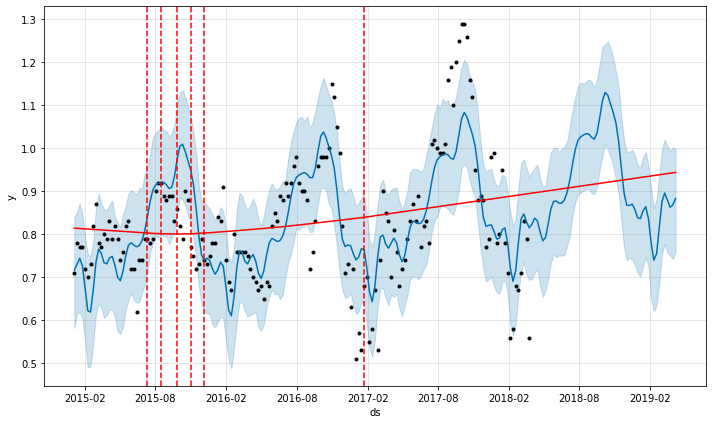

In [61]:
fig = m.plot(prophet_forecast_40)
fig.show()
a = add_changepoints_to_plot(fig.gca(), m, prophet_forecast_40)

- The prophet model prediction give the same result as arima:
    - The trend will be continued and its price will be the highest of all year.

C:\Users\DELL\AppData\Local\Temp/ipykernel_11872/71187928.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


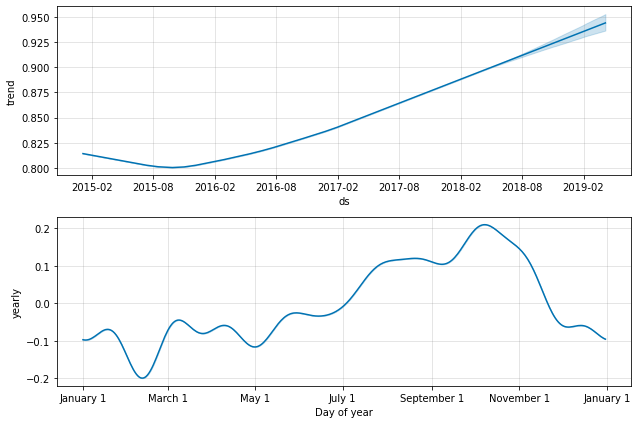

In [62]:
fig1 = m.plot_components(prophet_forecast_40)
fig1.show()

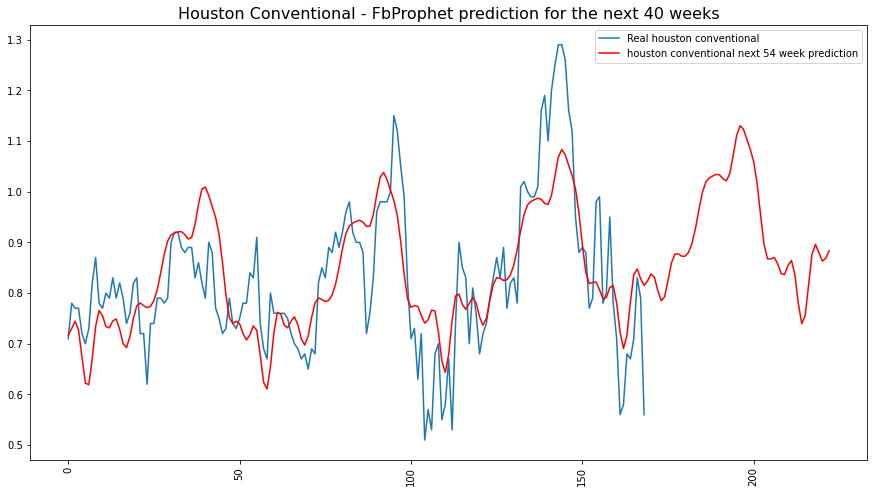

In [64]:
plt.figure(figsize=(15,8))
plt.plot(prophet_df['y'], label='Real houston conventional')
plt.plot(prophet_forecast_40['yhat'], label='houston conventional next 54 week prediction', 
         color='red')
plt.xticks(rotation='vertical')
plt.title("Houston Conventional - FbProphet prediction for the next 40 weeks", size = 16)
plt.legend()
plt.savefig("fbprophet4.png")
plt.show()

- Prophet trend seem quite safe, showed that it can not react with fluctuation just like arima and Holtwinter.
- But the prediction price area nearly the same as last year (increased a little bit).
- The houston conventional market will be the new market of the organization.

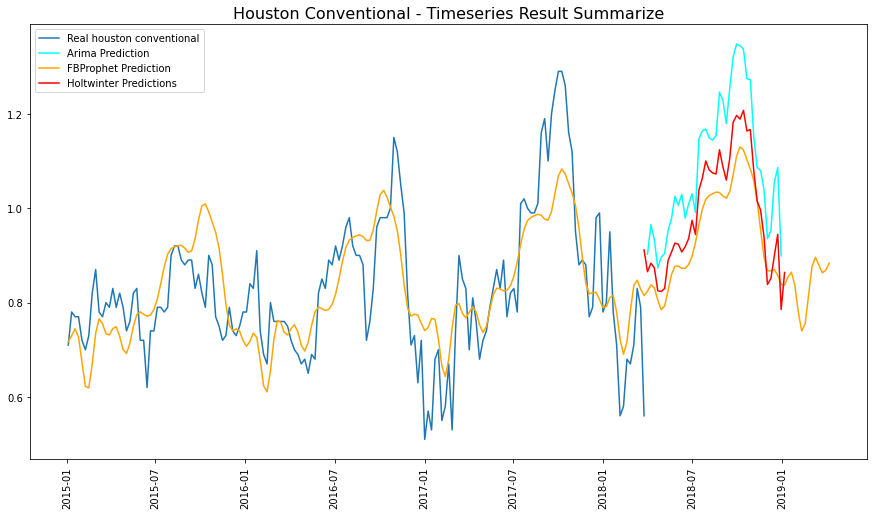

In [66]:
plt.figure(figsize=(15,8))
plt.plot(houston_c['AveragePrice'], label='Real houston conventional')
plt.plot(arima_forecast_40['houston_c_prediction'], label = 'Arima Prediction', color = 'cyan')
plt.plot(prophet_forecast_40[['ds', 'yhat']].set_index('ds'), label='FBProphet Prediction', 
         color='orange')
plt.plot(holtwinter_forecast_40, label = 'Holtwinter Predictions', color = 'red')
plt.title("Houston Conventional - Timeseries Result Summarize", size = 16)
plt.xticks(rotation='vertical')
plt.legend()
plt.savefig("result_summarize4.png")
plt.show()

##### In conclusion:
- The Fbprophet and Holtwinter will be best fit with the data, in my case prefer Holtwinter for flunctuation tactic and FBProphet for trend tactics.
    - The FbProphet seem to be safe, and its value prediction is nearly to Holtwinter and it good for showing the trend (in this case the trend will increased sightly).
    - Besides, the Holtwinter give us a chance for a possitive price this year, and with the volume trend prediction increased at the begining of this file, the profit gainned from this region is really good. Besides, we must have backup plan if the functuation comed up.
- Those 2 model are good, it showed us the price will continuing low in 2018 and 2019, and it will be a chance for us.
- So that houston willl be our new market in this and next year for both conventional & organic product.

### Thank you very much for your time